### Calculate the bedding orientation and stratigraphic thickness from 3D point coordinates
###### Given three points (p1, p2, p3) of a bedding surface the equation of the plane (Ax +By + Cz + D = 0) is calculated. Given another point (p0) from another surface the stratigraphic thickness is  calculated.

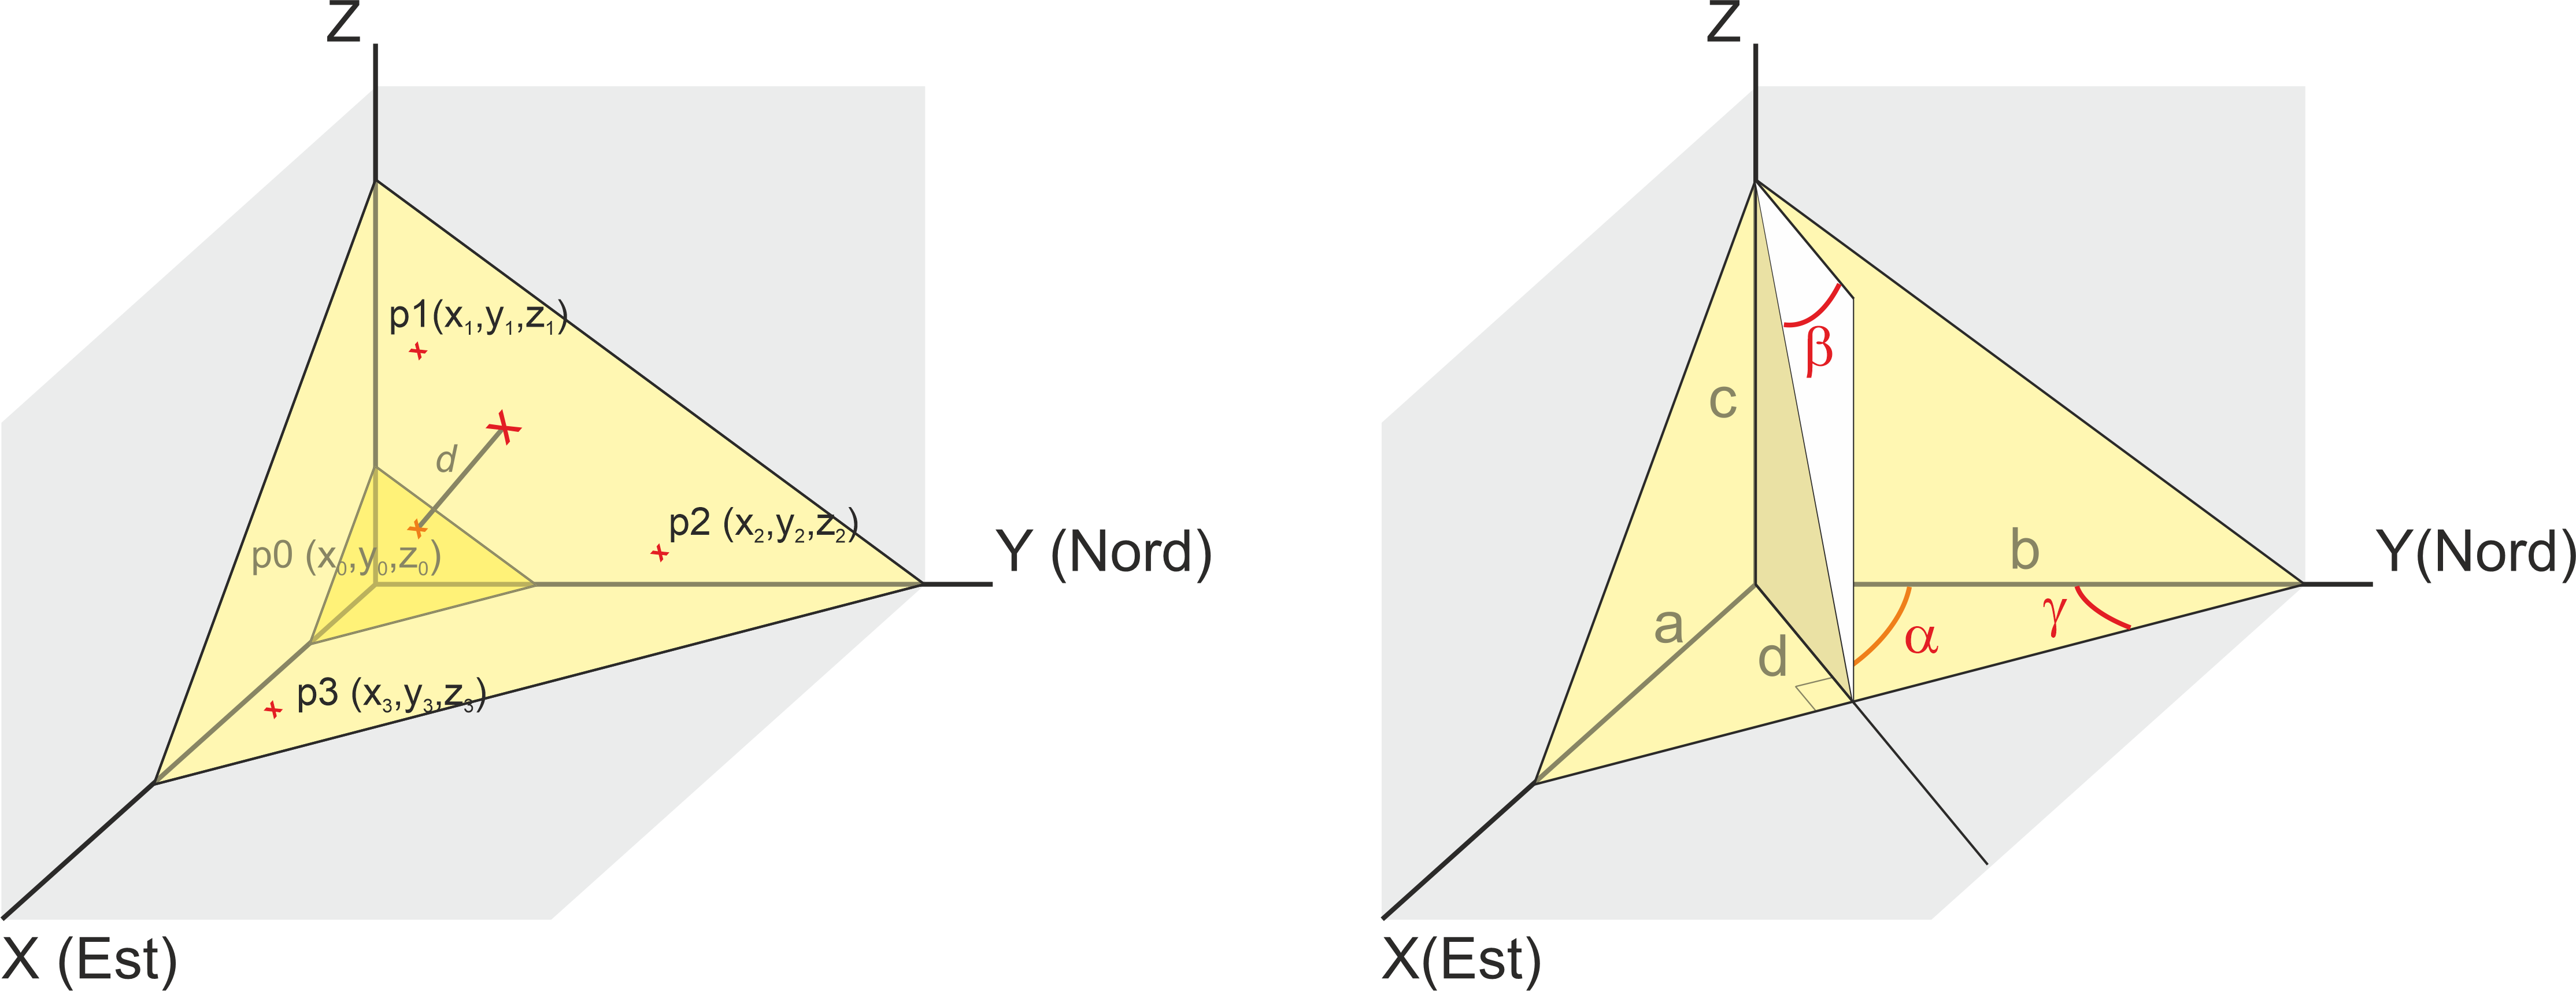

In [1]:
import numpy as np

1. Given the coordinates (xyz) of three points p1, p2 and p3, calculate the equation of the plane.

In [2]:
# three points defining the plane
p1 = np.array([1, 0, 0]) #point 1 coordinates: x1(East), y1(North), z1
p2 = np.array([1, 1, 0]) #point 2 coordinates: x2(East), y2(North), z2
p3 = np.array([0, 0, 1]) #point 3 coordinates:x3(East), y3(North), z3

# These two vectors are in the plane
v1 = p3 - p1
v2 = p2 - p1

# the cross product is a vector normal to the plane
pole = np.cross(v1, v2)
if pole[2]>0:
    pole = -pole
A, B, C = pole

# This evaluates A*x3 + B*y3 + C*z3 which equals -D
D = - np.dot(pole, p3)

print('The equation of the plane is {0}x + {1}y + {2}z + {3} = 0'.format(A,B,C,D))


The equation of the plane is -1x + 0y + -1z + 1 = 0


2. Calculate the orientation (dipdir and dip) of the plane.

In [3]:
# Calculate the pole of the plane (azimuth and dip) 
North_comp = B
East_comp = A
Z_comp = C
pole_azimuth = np.degrees(np.arctan2(East_comp,North_comp))
pole_dip = -np.degrees(np.arctan2(Z_comp, np.linalg.norm((North_comp,East_comp)))) #positive if downwards dip

# The  plane dip_dir is at 180 from the pole_azimuth
# The dip of the plane is 90 - the pole_dip.
if pole_azimuth < 180:
    dip_dir = (pole_azimuth +180).round()
else:
        dip_dir = (pole_azimuth - 180).round()
plane_dip = (90 - pole_dip).round()
print('The orientation of the plane (dipdir/dip) is {0:0>5}/{1:0>4}'.format(dip_dir, plane_dip))


The orientation of the plane (dipdir/dip) is 090.0/45.0


3. Calculate the thickness between point p0 and the plane Ax + Bc +Cz + D = 0

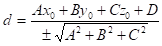

In [16]:
p0 = np.array([0, 0, 0]) #point 0 coordinates: x0(East), y0(North), z1

d = (A*p0[0]+B*p0[1]+C*p0[2]+D)/np.sqrt((A**2)+(B**2)+(C**2))
print('The thickness of the unit with bedding {0:0>3}/{1:0>2}(dipdir/dip) is {2} meters'.format(int(dip_dir), int(plane_dip), round(d,2)))

The thickness of the unit with bedding 090/45(dipdir/dip) is 0.71 meters
